## If you find this kernel helpful, Please UPVOTES.

## Problem Definition
- Given weather parameters about Australia, can we predict whether or not they have raintomorrow?

## We will use the following CLASSIFICATION METHODS for Prediction
- Logistic regression
- Naive Bayes
- K-Nearest Neighbor (KNN)
- Support Vector Mechanism (SVM) Get predictions using Machine Learning models and compare these scores.

## Data contains;
- Date 
- Location : Cities of Australia
- MinTemp 
- MaxTemp
- Rainfall
- Evaporation
- Sunshine
- WindGustDir : Wind Directions (East:E, West:W, North:N, South:S etc.)
- WindGustSpeed
- WindDir9am : Wind Directions (East:E, West:W, North:N, South:S etc.)
- WindDir3pm : Wind Directions (East:E, West:W, North:N, South:S etc.)
- WindSpeed9am
- WindSpeed3pm
- Humidity9am
- Humidity3pm
- Pressure9am
- Pressure3pm
- Cloud9am
- Cloud3pm
- Temp9am
- Temp3pm
- RainToday : 'No' 'Yes'
- RainTomorrow : 'No' 'Yes'

In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# Plotly for interactive graphics 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


## DATA READING AND EXPLORING

In [70]:
data=pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")
df=data.copy().sample(10000)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
134920,2014-05-02,Launceston,5.4,12.5,0.4,NaN,NaN,SSE,20.0,NaN,...,96.0,95.0,NaN,NaN,8.0,8.0,10.3,12.0,No,Yes
95984,2016-07-25,Townsville,18.0,28.6,0.0,2.8,NaN,SSE,28.0,SSW,...,48.0,43.0,1017.7,1014.0,NaN,NaN,23.9,27.7,No,No
120900,2009-03-20,Perth,14.9,25.0,0.0,8.4,5.8,WNW,37.0,W,...,61.0,42.0,1011.0,1010.5,7.0,6.0,20.8,23.8,No,Yes
110269,2013-10-23,Albany,10.5,17.8,0.0,4.0,NaN,NaN,NaN,E,...,65.0,64.0,1028.7,1027.0,7.0,7.0,14.1,15.3,No,No
136029,2017-05-15,Launceston,3.2,14.9,0.0,NaN,NaN,SSE,28.0,E,...,88.0,58.0,NaN,NaN,NaN,7.0,7.2,14.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101696,2015-02-20,MountGambier,12.2,30.3,0.0,6.8,10.7,S,37.0,SSE,...,83.0,41.0,1016.4,1014.7,7.0,3.0,17.9,28.2,No,No
56706,2013-07-21,Ballarat,0.6,5.6,5.0,NaN,NaN,N,44.0,N,...,99.0,98.0,1011.1,1011.0,7.0,8.0,2.8,4.3,Yes,No
31534,2011-11-20,Sydney,19.6,28.0,0.0,8.8,7.0,W,74.0,ENE,...,78.0,57.0,1010.2,1007.4,NaN,NaN,22.6,26.1,No,Yes
5391,2015-09-07,BadgerysCreek,7.0,22.8,0.4,NaN,NaN,NW,46.0,NE,...,100.0,42.0,NaN,NaN,NaN,NaN,10.6,21.1,No,No


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 134920 to 111024
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10000 non-null  object 
 1   Location       10000 non-null  object 
 2   MinTemp        9891 non-null   float64
 3   MaxTemp        9915 non-null   float64
 4   Rainfall       9778 non-null   float64
 5   Evaporation    5699 non-null   float64
 6   Sunshine       5249 non-null   float64
 7   WindGustDir    9289 non-null   object 
 8   WindGustSpeed  9291 non-null   float64
 9   WindDir9am     9293 non-null   object 
 10  WindDir3pm     9704 non-null   object 
 11  WindSpeed9am   9887 non-null   float64
 12  WindSpeed3pm   9777 non-null   float64
 13  Humidity9am    9808 non-null   float64
 14  Humidity3pm    9669 non-null   float64
 15  Pressure9am    8947 non-null   float64
 16  Pressure3pm    8956 non-null   float64
 17  Cloud9am       6181 non-null   float64
 18  

In [72]:
pd.DataFrame({"No. of unique values": list(df.nunique())}, index=df.columns)

,No. of unique values
Date,2997
Location,49
MinTemp,344
MaxTemp,412
Rainfall,274
Evaporation,172
Sunshine,140
WindGustDir,16
WindGustSpeed,53
WindDir9am,16


In [73]:
for i in df.select_dtypes(include='object'):   
    print(i,'-->',df[i].unique())

Date --> ['2014-05-02' '2016-07-25' '2009-03-20' ... '2011-12-27' '2015-11-17'
 '2014-09-14']
Location --> ['Launceston' 'Townsville' 'Perth' 'Albany' 'Adelaide' 'GoldCoast'
 'Wollongong' 'Bendigo' 'Portland' 'Darwin' 'WaggaWagga' 'SalmonGums'
 'Cairns' 'Uluru' 'PerthAirport' 'Nuriootpa' 'Woomera' 'Melbourne'
 'NorahHead' 'Ballarat' 'Canberra' 'Hobart' 'Tuggeranong' 'Mildura'
 'Witchcliffe' 'Brisbane' 'NorfolkIsland' 'Newcastle' 'Penrith' 'Sydney'
 'Katherine' 'MelbourneAirport' 'MountGinini' 'MountGambier' 'Walpole'
 'Watsonia' 'Richmond' 'Dartmoor' 'Sale' 'Nhil' 'Albury' 'BadgerysCreek'
 'PearceRAAF' 'SydneyAirport' 'Williamtown' 'Cobar' 'CoffsHarbour' 'Moree'
 'AliceSprings']
WindGustDir --> ['SSE' 'WNW' nan 'ENE' 'NE' 'NW' 'W' 'E' 'NNW' 'ESE' 'N' 'S' 'SE' 'WSW'
 'SSW' 'SW' 'NNE']
WindDir9am --> [nan 'SSW' 'W' 'E' 'NNE' 'NW' 'N' 'NNW' 'S' 'ESE' 'WNW' 'SW' 'SSE' 'SE'
 'ENE' 'NE' 'WSW']
WindDir3pm --> ['SW' 'NE' 'W' 'ESE' 'SE' 'ENE' nan 'NNW' 'WNW' 'WSW' 'SSE' 'E' 'NW' 'SSW'
 'S' 'N' 

In [74]:
y = len(df[df['RainToday'] == 'Yes'])
n = len(df[df['RainToday'] == 'No'])
print(y,n)

2122 7656


In [75]:
df.duplicated().sum()

0

In [76]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
MinTemp,9891.0,12.205187,6.358000,-7.5,7.7,12.0,16.9,30.3
MaxTemp,9915.0,23.200958,7.103850,-2.1,17.9,22.6,28.2,46.4
Rainfall,9778.0,2.351381,8.370874,0.0,0.0,0.0,0.6,219.6
Evaporation,5699.0,5.524478,4.450918,0.0,2.6,4.8,7.4,70.4
Sunshine,5249.0,7.588074,3.784187,0.0,4.8,8.4,10.6,13.9
WindGustSpeed,9291.0,40.162846,13.501412,9.0,31.0,39.0,48.0,109.0
WindSpeed9am,9887.0,14.104784,8.889591,0.0,7.0,13.0,19.0,74.0
WindSpeed3pm,9777.0,18.786335,8.798287,0.0,13.0,19.0,24.0,76.0
Humidity9am,9808.0,68.561786,18.928541,2.0,57.0,69.0,83.0,100.0
Humidity3pm,9669.0,51.409349,20.745248,2.0,37.0,52.0,65.0,100.0


In [77]:
print(df.shape)
print(df.ndim)
print(df.size)

(10000, 23)
2
230000


In [78]:
df.corr() #I can see from here which variables I can put into the model
          #For example, the variables can be removed by looking at the order of importance.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.734838,0.105964,0.456403,0.062887,0.183449,0.167902,0.175490,-0.232142,0.006746,-0.449743,-0.463282,0.098830,0.029115,0.901895,0.707136
MaxTemp,0.734838,1.000000,-0.077335,0.573235,0.460245,0.070376,0.011385,0.049895,-0.502634,-0.509844,-0.330309,-0.429886,-0.269935,-0.279018,0.886943,0.984500
Rainfall,0.105964,-0.077335,1.000000,-0.064150,-0.235290,0.127585,0.068470,0.055364,0.234333,0.264965,-0.165450,-0.126122,0.210773,0.175328,0.009528,-0.085120
Evaporation,0.456403,0.573235,-0.064150,1.000000,0.371452,0.204500,0.181048,0.140045,-0.471255,-0.371942,-0.265198,-0.290322,-0.166060,-0.178161,0.529530,0.558253
Sunshine,0.062887,0.460245,-0.235290,0.371452,1.000000,-0.023721,-0.009133,0.049664,-0.495295,-0.631157,0.038316,-0.027637,-0.679316,-0.711011,0.285695,0.482371
WindGustSpeed,0.183449,0.070376,0.127585,0.204500,-0.023721,1.000000,0.600088,0.683766,-0.223954,-0.024214,-0.462413,-0.416011,0.083357,0.118679,0.152161,0.031833
WindSpeed9am,0.167902,0.011385,0.068470,0.181048,-0.009133,0.600088,1.000000,0.499868,-0.270098,-0.034471,-0.224807,-0.168959,0.035644,0.064217,0.116187,-0.003906
WindSpeed3pm,0.175490,0.049895,0.055364,0.140045,0.049664,0.683766,0.499868,1.000000,-0.150667,0.017937,-0.306996,-0.261559,0.048616,0.039715,0.162774,0.023619
Humidity9am,-0.232142,-0.502634,0.234333,-0.471255,-0.495295,-0.223954,-0.270098,-0.150667,1.000000,0.665911,0.142393,0.189973,0.454678,0.365125,-0.470522,-0.492402
Humidity3pm,0.006746,-0.509844,0.264965,-0.371942,-0.631157,-0.024214,-0.034471,0.017937,0.665911,1.000000,-0.028246,0.053293,0.512546,0.529522,-0.221588,-0.558872


## SOME OF VISUALIZATION

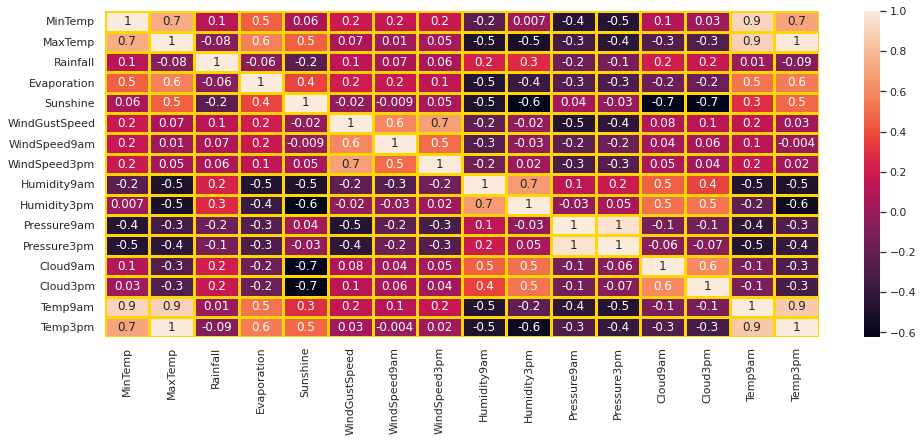

In [79]:
plt.figure(figsize = (16,6)) 
sns.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True,);

<AxesSubplot:>

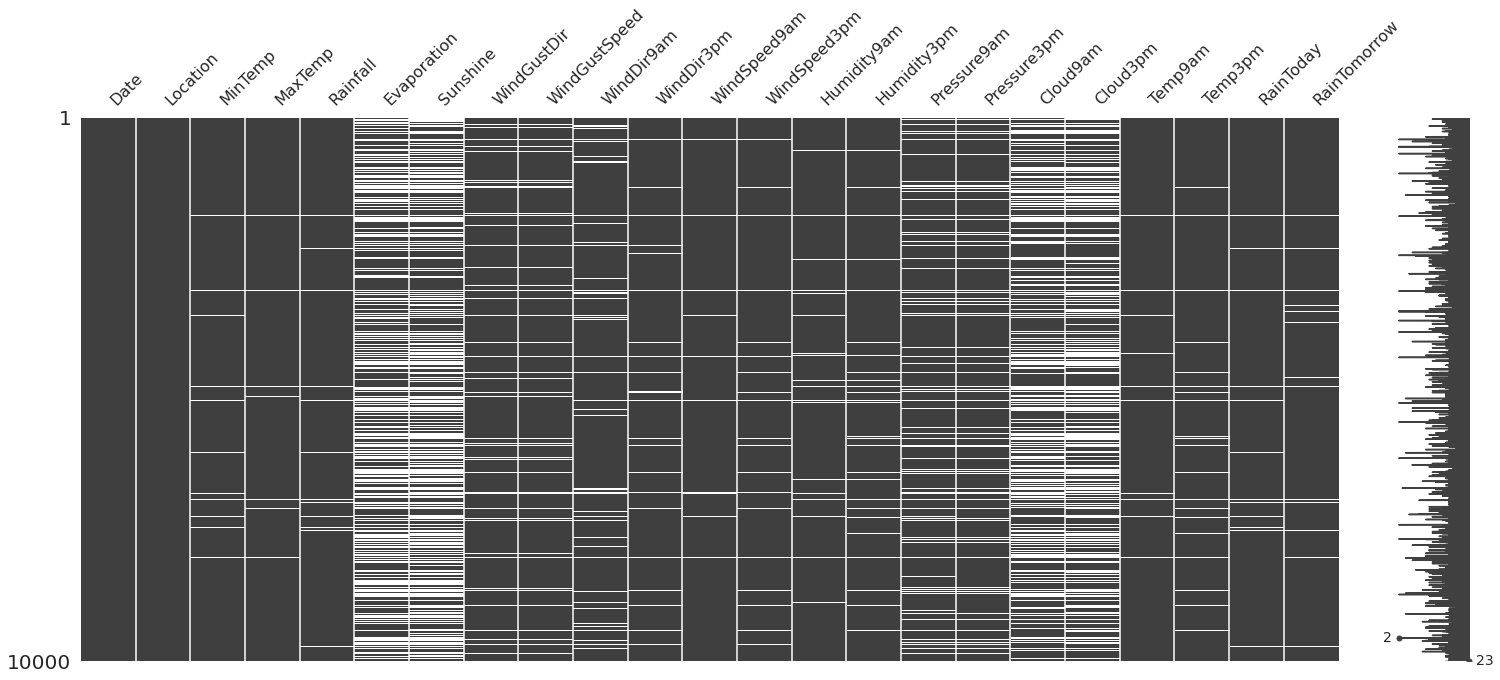

In [80]:
#VISUALIZATION OF NAN  VALUES
msno.matrix(df)

In [81]:
#drop missing values in the RainToday and RainTomorrow
df.dropna(subset=['RainToday', 'RainTomorrow'],axis=0,inplace=True)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

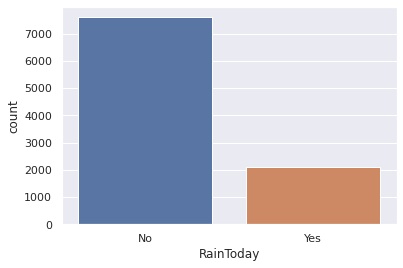

In [82]:
sns.countplot(x="RainToday",data=df)

## Multivariate imputation
- In multivariate imputation, we use ML Algorithms and before that we need to encode the categorical variables. 

In [83]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,5140,141,4556,0.0,13.9
Evaporation,float64,5603,172,4093,0.0,70.4
Cloud3pm,float64,5857,10,3839,0.0,8.0
Cloud9am,float64,6101,10,3595,0.0,8.0
Pressure9am,float64,8739,434,957,982.2,1038.7
Pressure3pm,float64,8743,428,953,983.2,1037.1
WindDir9am,object,9049,17,647,NaN,NaN
WindGustDir,object,9066,17,630,NaN,NaN
WindGustSpeed,float64,9068,54,628,9.0,109.0
WindDir3pm,object,9445,17,251,NaN,NaN


__________Data Types__________

float64    16
object      7
Name: Types, dtype: int64


In [84]:
#label encoding for univariate variables
from sklearn.preprocessing import LabelEncoder


lbe = LabelEncoder()
df["RainToday_label"] = lbe.fit_transform(df["RainToday"])
df["RainTomorrow_label"] = lbe.fit_transform(df["RainTomorrow"])

In [85]:
# one-hot encoding for variables with more than 2 categories

#drop variables with so many countries for the sake of time and memory consumption
df.drop(['Location','WindDir9am','WindDir3pm'], axis=1, inplace=True) 

df = pd.get_dummies(df, drop_first=True, columns = ['WindGustDir'], prefix = ['WindGustDir'])

In [86]:
def summary(df):
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0]) # .shape[0] yazilmaz ise unique olan degerlerin listelerini getirir.
    Nulls = df.apply(lambda x: x.isnull().sum())

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    display(str.sort_values(by='Nulls', ascending=False))
    print('__________Data Types__________\n')
    print(str.Types.value_counts())
summary(df)

,Types,Counts,Uniques,Nulls,Min,Max
Sunshine,float64,5140,141,4556,0.0,13.9
Evaporation,float64,5603,172,4093,0.0,70.4
Cloud3pm,float64,5857,10,3839,0.0,8.0
Cloud9am,float64,6101,10,3595,0.0,8.0
Pressure9am,float64,8739,434,957,982.2,1038.7
Pressure3pm,float64,8743,428,953,983.2,1037.1
WindGustSpeed,float64,9068,54,628,9.0,109.0
Humidity3pm,float64,9447,100,249,2.0,100.0
Temp3pm,float64,9511,412,185,-2.9,43.6
WindSpeed3pm,float64,9517,38,179,0.0,76.0


__________Data Types__________

float64    16
uint8      15
object      3
int64       2
Name: Types, dtype: int64


In [87]:
# DecisionTreeRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

#drop unnecessary columns and date columns
df_imputation = df.drop(['Date','RainToday','RainTomorrow'], axis=1) 

#define variables to keep the index and the columns
index = df_imputation.index
columns = df_imputation.columns

#imputation steps
imp_tree = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_tree.fit(df_imputation)
df_imputed = imp_tree.transform(df_imputation)

#transform imputed data in array format to dataframe
df_imputed_tree = pd.DataFrame(df_imputed, index=index, columns=columns)

df_imputed_tree.isnull().sum()

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
WindGustDir_ENE       0
WindGustDir_ESE       0
WindGustDir_N         0
WindGustDir_NE        0
WindGustDir_NNE       0
WindGustDir_NNW       0
WindGustDir_NW        0
WindGustDir_S         0
WindGustDir_SE        0
WindGustDir_SSE       0
WindGustDir_SSW       0
WindGustDir_SW        0
WindGustDir_W         0
WindGustDir_WNW       0
WindGustDir_WSW       0
dtype: int64

In [88]:
df_imputed_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9696 entries, 134920 to 111024
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MinTemp             9696 non-null   float64
 1   MaxTemp             9696 non-null   float64
 2   Rainfall            9696 non-null   float64
 3   Evaporation         9696 non-null   float64
 4   Sunshine            9696 non-null   float64
 5   WindGustSpeed       9696 non-null   float64
 6   WindSpeed9am        9696 non-null   float64
 7   WindSpeed3pm        9696 non-null   float64
 8   Humidity9am         9696 non-null   float64
 9   Humidity3pm         9696 non-null   float64
 10  Pressure9am         9696 non-null   float64
 11  Pressure3pm         9696 non-null   float64
 12  Cloud9am            9696 non-null   float64
 13  Cloud3pm            9696 non-null   float64
 14  Temp9am             9696 non-null   float64
 15  Temp3pm             9696 non-null   float64
 16 

In [89]:
df_imputed_tree.isnull().sum()

MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustSpeed         0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday_label       0
RainTomorrow_label    0
WindGustDir_ENE       0
WindGustDir_ESE       0
WindGustDir_N         0
WindGustDir_NE        0
WindGustDir_NNE       0
WindGustDir_NNW       0
WindGustDir_NW        0
WindGustDir_S         0
WindGustDir_SE        0
WindGustDir_SSE       0
WindGustDir_SSW       0
WindGustDir_SW        0
WindGustDir_W         0
WindGustDir_WNW       0
WindGustDir_WSW       0
dtype: int64

## PREDICTION WITH CLASSIFICATION METHODS
### Preparation dependent and independent variables

In [90]:
df2 = df_imputed_tree.copy()
x_dat = df2.drop(['RainTomorrow_label'],axis=1)
y = df2["RainTomorrow_label"].values

In [91]:
summary(df2)

,Types,Counts,Uniques,Nulls,Min,Max
Cloud3pm,float64,9696,9,0,0.0,8.0
WindGustDir_N,float64,9696,2,0,0.0,1.0
WindSpeed3pm,float64,9696,37,0,0.0,76.0
WindGustSpeed,float64,9696,53,0,9.0,109.0
WindGustDir_WSW,float64,9696,2,0,0.0,1.0
WindGustDir_WNW,float64,9696,2,0,0.0,1.0
WindGustDir_W,float64,9696,2,0,0.0,1.0
WindGustDir_SW,float64,9696,2,0,0.0,1.0
WindGustDir_SSW,float64,9696,2,0,0.0,1.0
WindGustDir_SSE,float64,9696,2,0,0.0,1.0


__________Data Types__________

float64    33
Name: Types, dtype: int64


### Normalization of variabales

In [92]:
#If there is a outlier values, it must be done before coming here
x=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values

### Test-Train splitting

In [93]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42) 

# 1) Modeling of Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression() #default olanlar gelir.C var..
lr_model.fit(x_train,y_train)

LogisticRegression()

In [137]:
print(lr_model.intercept_)
print(lr_model.coef_)#Bu katsayilar denklemin katsayilari(ax+b.. gibi). mesela (-) olanlar ters yonde etkiliyor.

[-3.76347049]
[[-0.18934088 -0.07679194  1.76867483 -1.58587728 -1.4027084   4.2280649
  -0.42425516 -1.45346629 -0.15236885  5.05786569  1.24003116 -3.77303134
  -0.02506417  0.60640098  1.06905737  0.11232344  0.61862305 -0.15865148
  -0.08892446  0.14268721  0.05436248 -0.16081549  0.35232102  0.19740908
  -0.34730698 -0.41534138 -0.24516564 -0.33266957 -0.29125458 -0.04301377
   0.09870504 -0.15551361]]


## Prediction of Logistic Regression

In [138]:
y_pred=lr_model.predict(x_test)

In [139]:
y_pred[0:10]#tahminlerin ilk 10 degerini gorduk

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Accuracy Test(for default) of Logistic regression

In [140]:
LR = accuracy_score(y_test,y_pred)
LR

0.8329322791337229

## Proba values - probability

In [99]:
y_probs = lr_model.predict_proba(x_test)[:,1]
y_probs

array([0.01399789, 0.06214863, 0.09293153, ..., 0.04901762, 0.06885328,
       0.05776271])

In [100]:
y_pred = [1 if i >0.70 else 0 for i in y_probs]
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [101]:
log_score = accuracy_score(y_test,y_pred)
print ("log score=",log_score)

log score= 0.8219319353729804


In [102]:
confusion_matrix(y_test,y_pred)

array([[2205,   44],
       [ 474,  186]])

## Model tuning of Logistic regression

In [103]:
lr_model = LogisticRegression(solver = "liblinear")
lr_model= lr_model.fit(x_train,y_train)
lr_model

LogisticRegression(solver='liblinear')

In [104]:
accuracy_score(y_test, lr_model.predict(x_test))

0.8329322791337229

In [105]:
#Cross validation (10 katli ) yaparsak
lr_finalscore=cross_val_score(lr_model, x_test, y_test, cv = 10).mean()
lr_finalscore

0.8342990875696172

# 2) Modeling of Gaussian Naive Bayes

In [142]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
nb_model

GaussianNB()

## Prediction of NB

In [143]:
y_pred = nb_model.predict(x_test)

## Accuracy score of NB

In [144]:
NB = accuracy_score(y_test,y_pred)
NB

0.7799931247851495

In [109]:
confusion_matrix(y_test,y_pred)

array([[1864,  385],
       [ 255,  405]])

## Model Tuning of NB

In [110]:
# 10 katli cross validation.
nb_finalscore=cross_val_score(nb_model, x_test, y_test, cv = 10).mean()
nb_finalscore

0.7641580756013746

# 3) Modeling of KNN

In [145]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(x_train, y_train)
?knn_model

Type:        KNeighborsClassifier
String form: KNeighborsClassifier()
File:        /opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py
Docstring:  
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
      containing the weights.

algorithm : {'auto', 

## Prediction of KNN

In [146]:
y_pred = knn_model.predict(x_test)

## Accuracy score of KNN

In [147]:
KNN = accuracy_score(y_test, y_pred)
KNN

0.7961498796837401

In [114]:
confusion_matrix(y_test,y_pred)

array([[2063,  186],
       [ 407,  253]])

## Model Tuning of KNN

In [148]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [149]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [150]:
print("The best score:" + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

The best score:0.8301165170018375
The best parameters: {'n_neighbors': 15}


In [151]:
knn = KNeighborsClassifier(3)  #we choose 3 neigboors. I think 1 is not good 
knn_tuned = knn.fit(x_train, y_train)

In [152]:
knn_finalscore=knn_tuned.score(x_test, y_test)
knn_finalscore

0.8002750085940186

# 4) Modeling of SVC

In [154]:
from sklearn.svm import SVC

svm_model = SVC().fit(x_train,y_train)#we choose default c:1,kernel:'rbf',dagree:3...
#?svm_model

## Prediction of SVC

In [155]:
y_pred = svm_model.predict(x_test)

## Accuracy score of SVC

In [156]:
SVC = accuracy_score(y_test,y_pred)
SVC

0.8370574080440014

## Model Tuning of SVC
- For kernel : rbf

In [123]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "rbf")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1,        
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   49.3s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [124]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 4}


In [125]:
svc_tuned1 = SVC(kernel = "rbf", C = 8).fit(x_train, y_train)
y_pred = svc_tuned1.predict(x_test)
accuracy_score(y_test, y_pred)

0.8346510828463389

- For kernel : linear

In [126]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   34.4s finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [127]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 1}


In [128]:
svc_tuned2 = SVC(kernel = "linear", C = 6).fit(x_train, y_train)
y_pred = svc_tuned2.predict(x_test)
accuracy_score(y_test, y_pred)

0.8353386043313854

- For kernel:rbf , C and gamma

In [129]:
svc_model = SVC(kernel = "rbf").fit(x_train, y_train)

In [130]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [131]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  8.4min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [132]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 100, 'gamma': 0.001}


In [133]:
svc_tuned3 = SVC(C = 5, gamma =50).fit(x_train, y_train)
y_pred = svc_tuned3.predict(x_test)
svc_finalscore=accuracy_score(y_test, y_pred)
svc_finalscore

0.7734616706772086

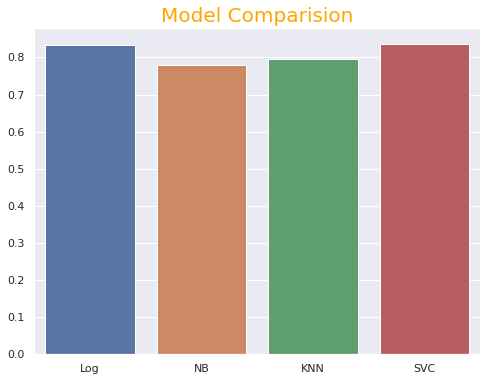

In [157]:
indexx = ["Log","NB","KNN","SVC"]
regressions = [LR,NB,KNN,SVC]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)

plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);